In [1]:
import pathlib
import numpy as np

# turn our training path into a Python path
data_dir = pathlib.Path("D:/KNUniversity/4 year/neural networks/food_classes/train/")

# created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['beignets' 'falafel' 'nachos']


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "D:/KNUniversity/4 year/neural networks/food_classes/test/"
test_dir = "D:/KNUniversity/4 year/neural networks/food_classes/train/"

In [32]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


# ADAM optimizer

## CNN model

In [ ]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
24/24 [==============================] - 46s 2s/step - loss: 1.0198 - accuracy: 0.4560 - val_loss: 0.9347 - val_accuracy: 0.5289
Epoch 2/5
24/24 [==============================] - 43s 2s/step - loss: 0.7869 - accuracy: 0.6520 - val_loss: 0.9959 - val_accuracy: 0.5689
Epoch 3/5
24/24 [==============================] - 42s 2s/step - loss: 0.7126 - accuracy: 0.7080 - val_loss: 0.9215 - val_accuracy: 0.5556
Epoch 4/5
24/24 [==============================] - 38s 2s/step - loss: 0.6010 - accuracy: 0.7707 - val_loss: 1.2314 - val_accuracy: 0.5467
Epoch 5/5
24/24 [==============================] - 38s 2s/step - loss: 0.5524 - accuracy: 0.7760 - val_loss: 1.0070 - val_accuracy: 0.6044


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

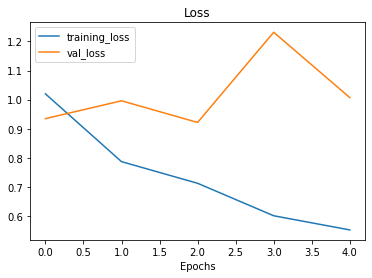

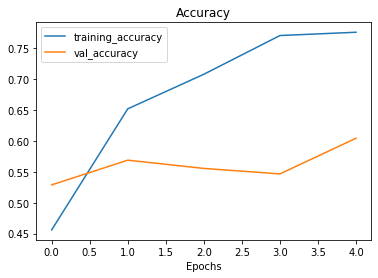

In [8]:
plot_loss_curves(history_1)

## ResNet101 model

In [35]:
model_2=tf.keras.applications.ResNet101(include_top=False)
model_2.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_2(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_resnet=tf.keras.Model(inputs,outputs)

In [36]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [37]:
history_resnet_adam =  model_resnet.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 237s 10s/step - loss: 1.1414 - accuracy: 0.3213 - val_loss: 1.0898 - val_accuracy: 0.3467
Epoch 2/5
24/24 [==============================] - 246s 10s/step - loss: 1.0750 - accuracy: 0.3880 - val_loss: 1.0676 - val_accuracy: 0.4311
Epoch 3/5
24/24 [==============================] - 241s 10s/step - loss: 1.0521 - accuracy: 0.4480 - val_loss: 1.0602 - val_accuracy: 0.3956
Epoch 4/5
24/24 [==============================] - 224s 9s/step - loss: 1.0496 - accuracy: 0.4360 - val_loss: 1.0563 - val_accuracy: 0.4311
Epoch 5/5
24/24 [==============================] - 244s 10s/step - loss: 1.0413 - accuracy: 0.4560 - val_loss: 1.0506 - val_accuracy: 0.4133


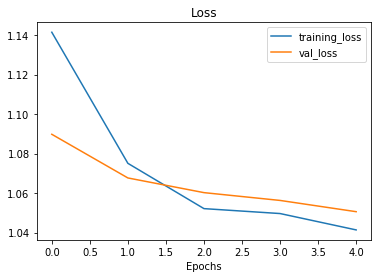

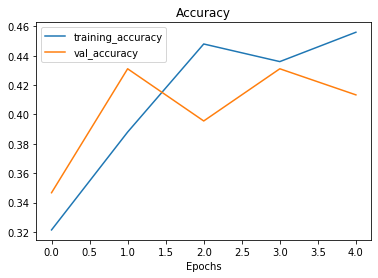

In [38]:
plot_loss_curves(history_resnet_adam)

In [39]:
model_resnet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet101 (Functional)       (None, None, None, 2048)  42658176  
_________________________________________________________________
gap_layer (GlobalAveragePool (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6147      
Total params: 42,664,323
Trainable params: 6,147
Non-trainable params: 42,658,176
_________________________________________________________________


In [41]:
for layer in model_2.layers[-20:]:
    layer.trainable=True

In [42]:
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [43]:
history_resnet_adam_1 =  model_resnet.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data, 
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 248s 10s/step - loss: 1.0341 - accuracy: 0.4680 - val_loss: 1.0536 - val_accuracy: 0.4400
Epoch 2/5
24/24 [==============================] - 248s 10s/step - loss: 0.9671 - accuracy: 0.5200 - val_loss: 1.0675 - val_accuracy: 0.4089
Epoch 3/5
24/24 [==============================] - 249s 10s/step - loss: 0.9461 - accuracy: 0.5360 - val_loss: 1.0612 - val_accuracy: 0.4444
Epoch 4/5
24/24 [==============================] - 249s 10s/step - loss: 0.9049 - accuracy: 0.5760 - val_loss: 1.0771 - val_accuracy: 0.4089
Epoch 5/5
24/24 [==============================] - 241s 10s/step - loss: 0.9162 - accuracy: 0.5747 - val_loss: 1.1128 - val_accuracy: 0.3778


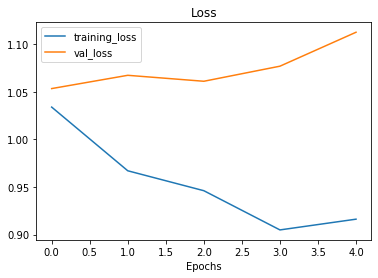

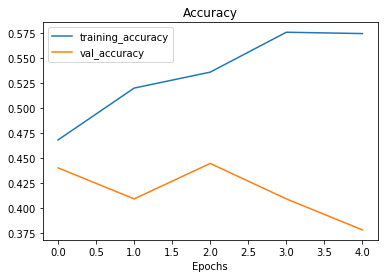

In [44]:
plot_loss_curves(history_resnet_adam_1)

Відкривши для тренування 20 останніх шарів, результати кращими не стали, а навпаки трохи погіршились.

## Efficient model

In [46]:
model_3=tf.keras.applications.EfficientNetB0(include_top=False)
model_3.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

x=model_3(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="gap_layer")(x)
outputs= tf.keras.layers.Dense(3,activation="softmax",name="output_layer")(x)

model_efficient=tf.keras.Model(inputs,outputs)

In [47]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [48]:
model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)
history_efficient_adam =  model_efficient.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 69s 3s/step - loss: 1.1040 - accuracy: 0.3187 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 57s 2s/step - loss: 1.1070 - accuracy: 0.3333 - val_loss: 1.1020 - val_accuracy: 0.3333
Epoch 3/5
24/24 [==============================] - 63s 3s/step - loss: 1.1092 - accuracy: 0.3200 - val_loss: 1.0994 - val_accuracy: 0.3333
Epoch 4/5
24/24 [==============================] - 69s 3s/step - loss: 1.1044 - accuracy: 0.3267 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 5/5
24/24 [==============================] - 72s 3s/step - loss: 1.1033 - accuracy: 0.3267 - val_loss: 1.0992 - val_accuracy: 0.3333


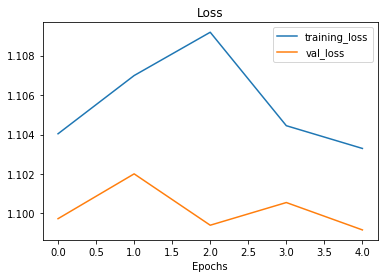

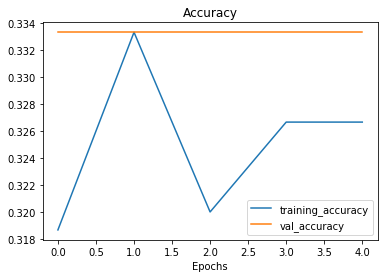

In [49]:
plot_loss_curves(history_efficient_adam)

????????

In [51]:
for layer in model_3.layers[-20:]:
    layer.trainable=True

In [52]:
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
)

In [53]:
history_efficient_adam_1 =  model_efficient.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 66s 2s/step - loss: 1.1178 - accuracy: 0.3240 - val_loss: 1.1065 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 56s 2s/step - loss: 1.1145 - accuracy: 0.3280 - val_loss: 1.1149 - val_accuracy: 0.3333
Epoch 3/5
24/24 [==============================] - 67s 3s/step - loss: 1.1211 - accuracy: 0.3307 - val_loss: 1.1116 - val_accuracy: 0.3333
Epoch 4/5
24/24 [==============================] - 70s 3s/step - loss: 1.1162 - accuracy: 0.3080 - val_loss: 1.1187 - val_accuracy: 0.3333
Epoch 5/5
24/24 [==============================] - 63s 3s/step - loss: 1.1043 - accuracy: 0.3400 - val_loss: 1.1051 - val_accuracy: 0.3333


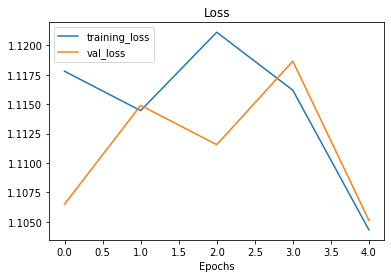

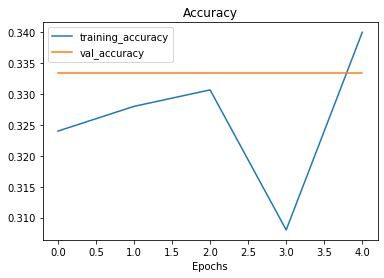

In [54]:
plot_loss_curves(history_efficient_adam_1)

# SGD

## CNN model

In [56]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
24/24 [==============================] - 41s 2s/step - loss: 1.0921 - accuracy: 0.3733 - val_loss: 1.0770 - val_accuracy: 0.3822
Epoch 2/5
24/24 [==============================] - 39s 2s/step - loss: 1.0500 - accuracy: 0.4773 - val_loss: 1.0378 - val_accuracy: 0.4667
Epoch 3/5
24/24 [==============================] - 46s 2s/step - loss: 0.9727 - accuracy: 0.5320 - val_loss: 0.9591 - val_accuracy: 0.5244
Epoch 4/5
24/24 [==============================] - 45s 2s/step - loss: 1.0439 - accuracy: 0.4880 - val_loss: 1.0565 - val_accuracy: 0.4133
Epoch 5/5
24/24 [==============================] - 45s 2s/step - loss: 0.9297 - accuracy: 0.6013 - val_loss: 0.9899 - val_accuracy: 0.5333


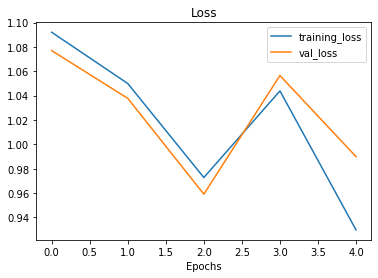

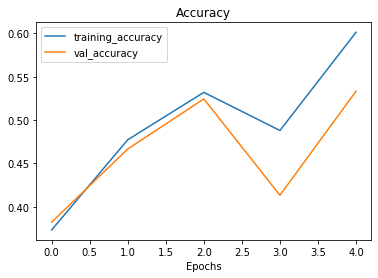

In [57]:
plot_loss_curves(history_2)

## ResNet 

In [61]:
model_2.trainable=False
model_resnet.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_resnet_sgd =  model_resnet.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 67s 2s/step - loss: 1.0997 - accuracy: 0.3227 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 53s 2s/step - loss: 1.0985 - accuracy: 0.3373 - val_loss: 1.0990 - val_accuracy: 0.3289
Epoch 3/5
24/24 [==============================] - 53s 2s/step - loss: 1.1006 - accuracy: 0.3120 - val_loss: 1.0989 - val_accuracy: 0.2533
Epoch 4/5
24/24 [==============================] - 53s 2s/step - loss: 1.0993 - accuracy: 0.3107 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 5/5
24/24 [==============================] - 59s 2s/step - loss: 1.1009 - accuracy: 0.3040 - val_loss: 1.0990 - val_accuracy: 0.3333


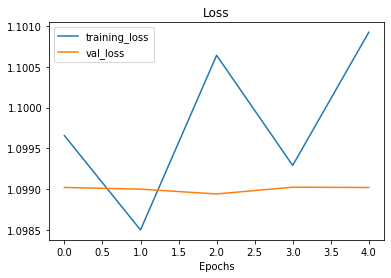

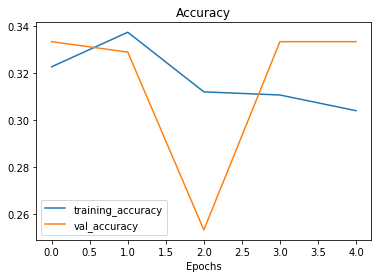

In [62]:
plot_loss_curves(history_resnet_sgd)

In [63]:
model_3.trainable=False
model_efficient.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=['accuracy']
)
history_efficient_sgd =  model_efficient.fit(train_data, 
                                        epochs=5, 
                                        # steps_per_epoch=len(train_data), 
                                        validation_data=valid_data
                                        # validation_steps=len(test_data)
                                        )

Epoch 1/5
24/24 [==============================] - 85s 3s/step - loss: 1.1021 - accuracy: 0.3373 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 2/5
24/24 [==============================] - 65s 3s/step - loss: 1.0988 - accuracy: 0.3547 - val_loss: 1.0977 - val_accuracy: 0.3333
Epoch 3/5
24/24 [==============================] - 62s 3s/step - loss: 1.1049 - accuracy: 0.3227 - val_loss: 1.0976 - val_accuracy: 0.3333
Epoch 4/5
24/24 [==============================] - 63s 3s/step - loss: 1.1062 - accuracy: 0.3013 - val_loss: 1.0975 - val_accuracy: 0.3333
Epoch 5/5
24/24 [==============================] - 69s 3s/step - loss: 1.1021 - accuracy: 0.3107 - val_loss: 1.0986 - val_accuracy: 0.3333


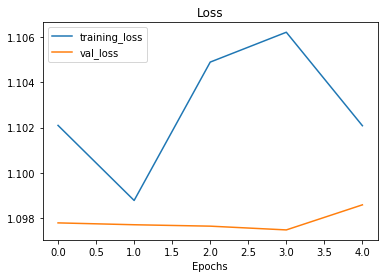

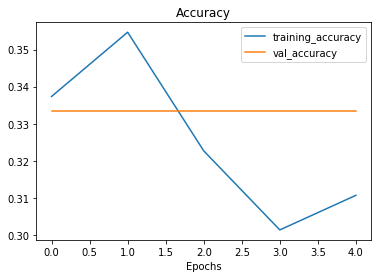

In [64]:
plot_loss_curves(history_efficient_sgd)